In [16]:
"""
Name: Assignment 1 - Question 1
Course: ADSP 31017 Machine Learning I
Author: Olivia Rumere
Organization: University of Chicago
Last Modified: January 27, 2025
(C) All Rights Reserved.
"""

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

#### a) What is the number of items in the Universal Set?  What is the maximum number of itemsets we can find in theory from the data?  What is the maximum number of association rules we can generate from the data in theory?


In [30]:
import matplotlib.pyplot as plt
import numpy
import pandas
import sys
import math

from mlxtend.frequent_patterns import (apriori, association_rules)
from mlxtend.preprocessing import TransactionEncoder

# Set some options for printing all the columns
numpy.set_printoptions(precision = 10, threshold = sys.maxsize)
numpy.set_printoptions(linewidth = numpy.inf)

pandas.set_option('display.max_columns', None)
pandas.set_option('display.expand_frame_repr', False)
pandas.set_option('max_colwidth', None)

pandas.options.display.float_format = '{:,.10f}'.format

Chinese_Bakery = pandas.read_csv('/Users/olivia/Downloads/ML - Assignment 1/Chinese_Bakery.csv')

# Convert the Sale Receipt data to the Item List format
ListItem = Chinese_Bakery.groupby(['Customer'])['Item'].apply(list).values.tolist()

# Convert the Item List format to the Item Indicator format
te = TransactionEncoder()
te_ary = te.fit(ListItem).transform(ListItem)
ItemIndicator = pandas.DataFrame(te_ary, columns=te.columns_)
nCustomer, nProduct = ItemIndicator.shape

# Universal Set
nProduct = ItemIndicator.shape[1]  # Total number of unique items
print(f"Number of items in the Universal Set: {nProduct}")

# Maximum Number of Itemsets
max_itemsets = (2 ** nProduct) - 1
print(f"Maximum number of itemsets that can be found in theory: {max_itemsets:,}")

# Maximum Number of Association Rules
max_association_rules = (3 ** nProduct) - (2 ** (nProduct + 1)) + 1
print(f"Maximum number of association rules that can be generated in theory: {max_association_rules:,}")


Number of items in the Universal Set: 16
Maximum number of itemsets that can be found in theory: 65,535
Maximum number of association rules that can be generated in theory: 42,915,650


#### b) 	We are only interested in itemsets that can be found in the market baskets of at least one hundred and fifty (150) customers.  Under this requirement, how many itemsets did we find?  Also, what is the largest number of items, i.e., k, among these itemsets?

In [37]:
# Find the frequent itemsets using the minimum support
min_support = 150 / nCustomer
frequent_itemsets = apriori(ItemIndicator, min_support=min_support, use_colnames=True)

# Count the number of itemsets found
num_itemsets = len(frequent_itemsets)

# Add a column for the size of each itemset (k)
frequent_itemsets['k'] = frequent_itemsets['itemsets'].apply(len)

# Find the largest size of itemsets (k)
max_k = frequent_itemsets['k'].max()

# Output the results
print(f"Number of itemsets found: {num_itemsets}")
print(f"Largest number of items in an itemset (k): {max_k}")
print(frequent_itemsets)

Number of itemsets found: 253
Largest number of items in an itemset (k): 4
         support                                                                        itemsets  k
0   0.7015075377                                                                  (BBQ Pork Bun)  1
1   0.6422110553                                                                (Bean Paste Bun)  1
2   0.5738693467                                                          (Coconut Cocktail Bun)  1
3   0.4693467337                                                         (Coconut Sweet Top Bun)  1
4   0.4603015075                                                             (Coconut Twist Bun)  1
..           ...                                                                             ... ..
248 0.1648241206  (Ham & Egg Bun, Coconut Cocktail Bun, Pineapple Sweet Top Bun, Bean Paste Bun)  4
249 0.1668341709       (Ham & Egg Bun, Plain Dinner Rolls, Coconut Cocktail Bun, Bean Paste Bun)  4
250 0.1557788945     (Ham

#### c) Following up on Part (b), generate the association rules whose Confidence metrics are at least 10%.  How many association rules can we find?  Next, we plot the Support metric on the vertical axis against the Confidence metric on the horizontal axis for these association rules.  We will color the points by the Lift metric (thus you need to add a color gradient legend).

In [48]:
# Discover the association rules
assoc_rules = association_rules(frequent_itemsets,num_itemsets=num_itemsets, metric = "confidence", min_threshold = 0.1)
total_assoc_rules =len(assoc_rules)
print(f"Total association rules: {total_assoc_rules}")
assoc_rules.head(5)

Total association rules: 1406


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(BBQ Pork Bun),(Bean Paste Bun),0.7015075377,0.6422110553,0.4653266332,0.6633237822,1.0328750600,1.0000000000,0.0148107371,1.0627092911,0.1066314695,0.5297482838,0.0590088857,0.6939467111
1,(Bean Paste Bun),(BBQ Pork Bun),0.6422110553,0.7015075377,0.4653266332,0.7245696401,1.0328750600,1.0000000000,0.0148107371,1.0837311558,0.0889594001,0.5297482838,0.0772619255,0.6939467111
2,(BBQ Pork Bun),(Coconut Cocktail Bun),0.7015075377,0.5738693467,0.4140703518,0.5902578797,1.0285579514,1.0000000000,0.0114966794,1.0399971887,0.0930175542,0.4807467911,0.0384589393,0.6558995178
3,(Coconut Cocktail Bun),(BBQ Pork Bun),0.5738693467,0.7015075377,0.4140703518,0.7215411559,1.0285579514,1.0000000000,0.0114966794,1.0719446288,0.0651561641,0.4807467911,0.0671159936,0.6558995178
4,(BBQ Pork Bun),(Coconut Sweet Top Bun),0.7015075377,0.4693467337,0.3276381910,0.4670487106,0.9951037838,1.0000000000,-0.0016120805,0.9956881180,-0.0162165458,0.3885578069,-0.0043305548,0.5825607579


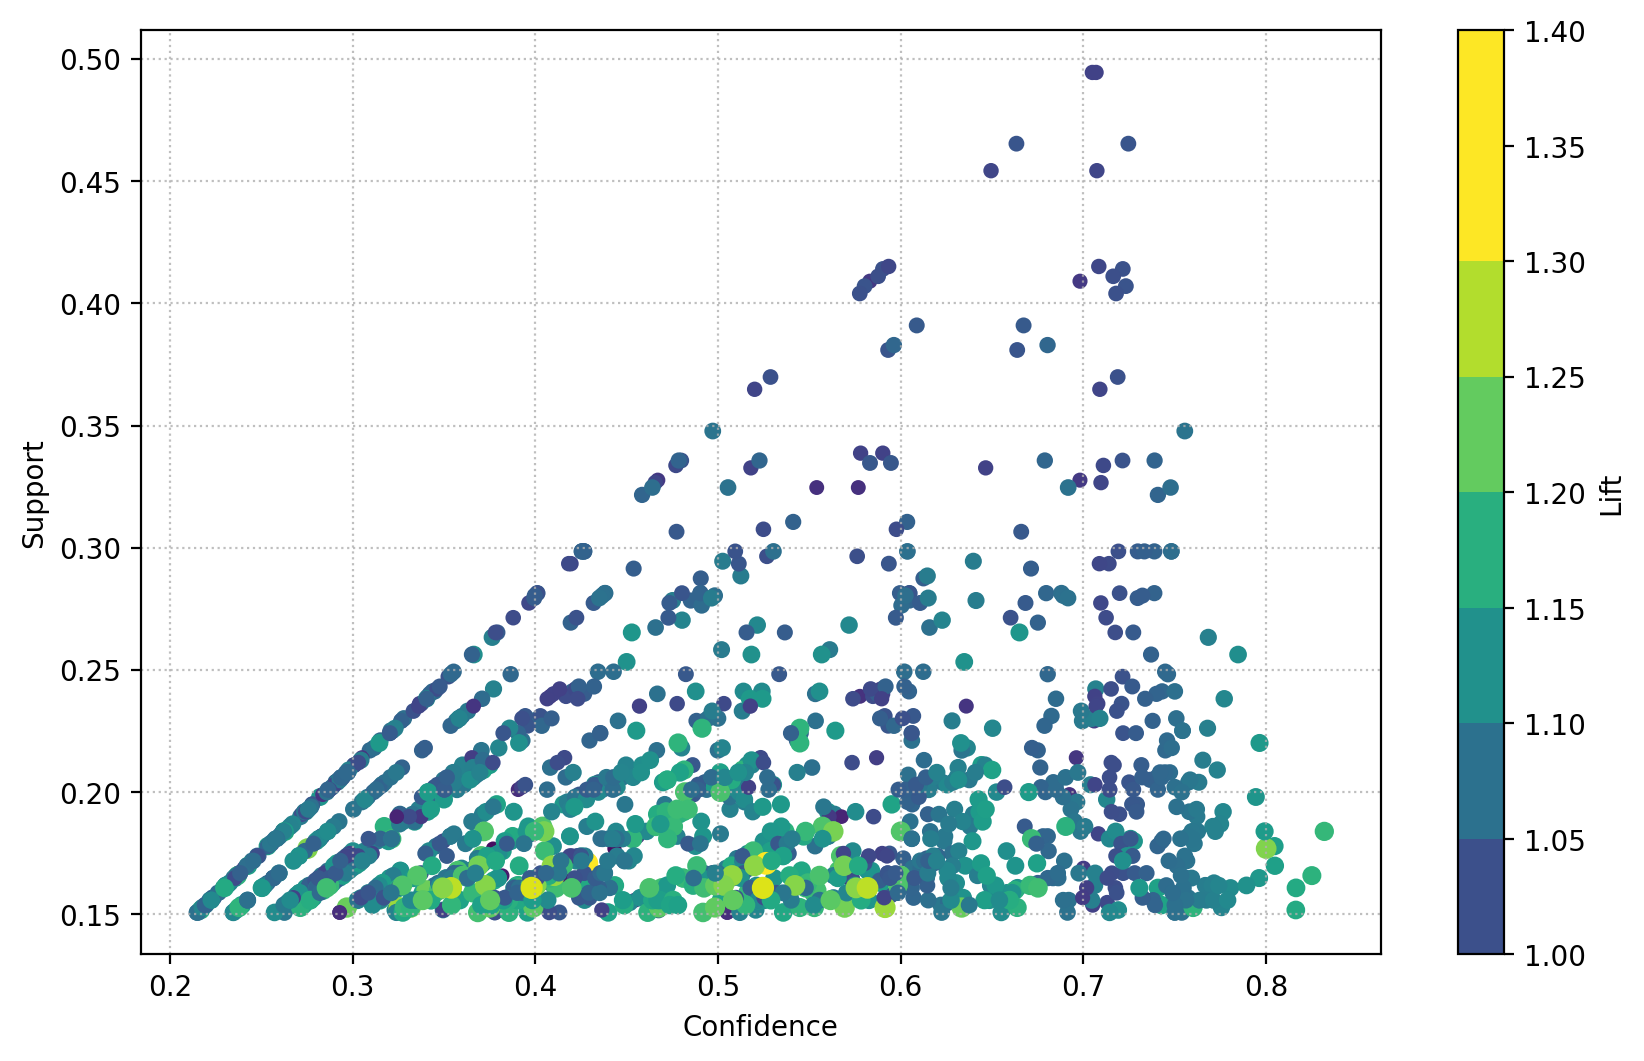

In [50]:
fig, ax = plt.subplots(1, 1, figsize = (10,6), dpi = 200)
cs = ax.scatter(assoc_rules['confidence'], assoc_rules['support'], marker = 'o', \
                c = assoc_rules['lift'], s = numpy.power(20, assoc_rules['lift']))
ax.set_xlabel('Confidence')
ax.set_ylabel('Support')
ax.grid(axis = 'both', linestyle = ':', alpha = 0.8)
fig.colorbar(cs, label = 'Lift', boundaries = numpy.arange(1.0, 1.45, 0.05))
plt.show()

#### 4) Among the association rules that you found in Part (c), list the rules, in a table, where the Consequent itemset contains Ham & Egg Bun and the Confidence metrics are at least 80%.  Show only the Antecedent itemset, the Consequent itemset, the Support of the rule, the Confidence, the Expected Confidence, and the Lift metrics.  Also, sort the rules in descending order of the Lift metric.

In [54]:
# where the Consequent itemset contains Ham & Egg Bun and the Confidence metrics are at least 80%
hasHamEggbun = [set({"Ham & Egg Bun"}).issubset(x) for x in assoc_rules["consequents"]]
HamEggbun_Consequent_rules = assoc_rules[hasHamEggbun]
HamEggbun_Consequent_rules = HamEggbun_Consequent_rules[HamEggbun_Consequent_rules["confidence"] >= 0.8]
HamEggbun_Consequent_rules = HamEggbun_Consequent_rules[[
    "antecedents", 
    "consequents", 
    "support", 
    "confidence", 
    "consequent support", 
    "lift"
]]
# Sort the rules by lift in descending order
HamEggbun_Consequent_rules = HamEggbun_Consequent_rules.sort_values(by="lift", ascending=False).reset_index(drop=True)
print(HamEggbun_Consequent_rules)

,antecedents,consequents,support,confidence,consequent support,lift
0,(Sponge Cake),(Ham & Egg Bun),0.1839195980,0.8318181818,0.6994974874,1.1891653605
1,"(BBQ Pork Bun, Coconut Twist Bun, Plain Dinner Rolls)",(Ham & Egg Bun),0.1658291457,0.8250000000,0.6994974874,1.1794181034
2,"(Coconut Twist Bun, Bean Paste Bun, Plain Dinner Rolls)",(Ham & Egg Bun),0.1608040201,0.8163265306,0.6994974874,1.1670185316
3,"(Coconut Twist Bun, Egg Custard Tart)",(Ham & Egg Bun),0.1517587940,0.8162162162,0.6994974874,1.1668608263
4,"(BBQ Pork Bun, Coconut Twist Bun, Pineapple Sweet Top Bun)",(Ham & Egg Bun),0.1698492462,0.8047619048,0.6994974874,1.1504857690
